<a href="https://colab.research.google.com/github/rehman2222/AI/blob/main/RNN_Result_Reproduce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/4
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.5139 - loss: 0.6926 - val_accuracy: 0.5186 - val_loss: 0.6869
Epoch 2/4
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5351 - loss: 0.6741 - val_accuracy: 0.5300 - val_loss: 0.6782
Epoch 3/4
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5729 - loss: 0.6358 - val_accuracy: 0.5390 - val_loss: 0.6799
Epoch 4/4
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5633 - loss: 0.6171 - val_accuracy: 0.5342 - val_loss: 1.1279
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5377 - loss: 1.1215
Test Accuracy: 0.53


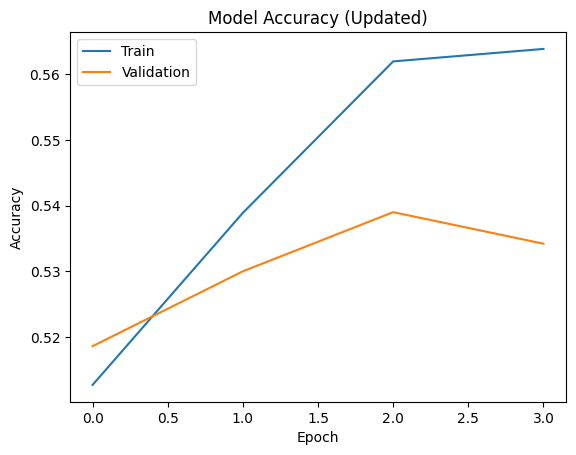

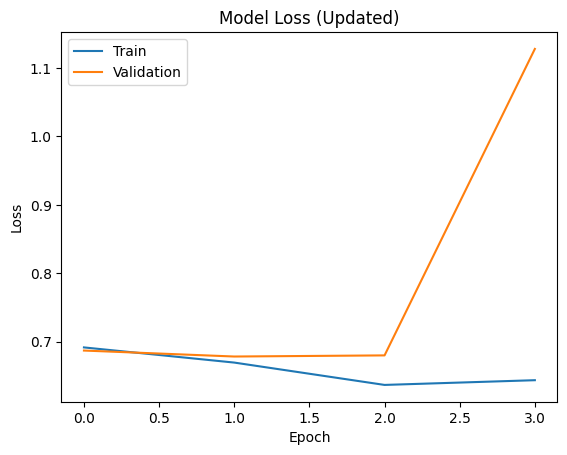

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
Predicted Sentiment: Negative


In [2]:
# 1. Import necessary libraries
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM  # Added LSTM
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt

# 2. Set parameters for the dataset
max_features = 8000
maxlen = 400

# 3. Load IMDB dataset (same)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# 4. Pad sequences
x_train = sequence.pad_sequences(x_train, maxlen=maxlen, padding='post')
x_test = sequence.pad_sequences(x_test, maxlen=maxlen, padding='post')

# 5. Build the RNN model
model = Sequential()

model.add(Embedding(max_features, 64))

# BASIC CHANGE: Replaced SimpleRNN with LSTM
model.add(LSTM(40)) # Changed SimpleRNN to LSTM

# Final output layer (same)
model.add(Dense(1, activation='sigmoid'))

# 6. Compile the model
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 7. Train the model
history = model.fit(
    x_train, y_train,
    epochs=4,
    batch_size=64,
    validation_split=0.2
)

# 8. Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

# 9. Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy (Updated)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss (Updated)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

# 10. Prediction on sample review
sample_review = x_test[1]
sample_review_input = np.expand_dims(sample_review, axis=0)
prediction = model.predict(sample_review_input)[0][0]

if prediction > 0.5:
    print("Predicted Sentiment: Positive")
else:
    print("Predicted Sentiment: Negative")